In [1]:
import pandas as pd #dataframe
import numpy as np #numbers
import matplotlib.pyplot as plt #plotting

In [2]:

# === Load Data ===
df = pd.read_csv('studying.csv', header=None)
signal = df.iloc[:, 1].fillna(0).values
fs = 256
samples = 1000

In [3]:

# === Basic moving average band approximation ===
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')


# Approximate bands
delta = moving_average(signal, int(fs / 2))  # ~0.5–4 Hz
alpha = moving_average(signal - moving_average(signal, fs), int(fs // 10))  # ~8–13 Hz
beta = moving_average(signal - moving_average(signal, fs // 2), int(fs // 20))  # ~13–30 Hz

In [4]:

# Normalize each band for fair visual comparison
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

delta_norm = normalize(delta[:samples])
alpha_norm = normalize(alpha[:samples])
beta_norm = normalize(beta[:samples])


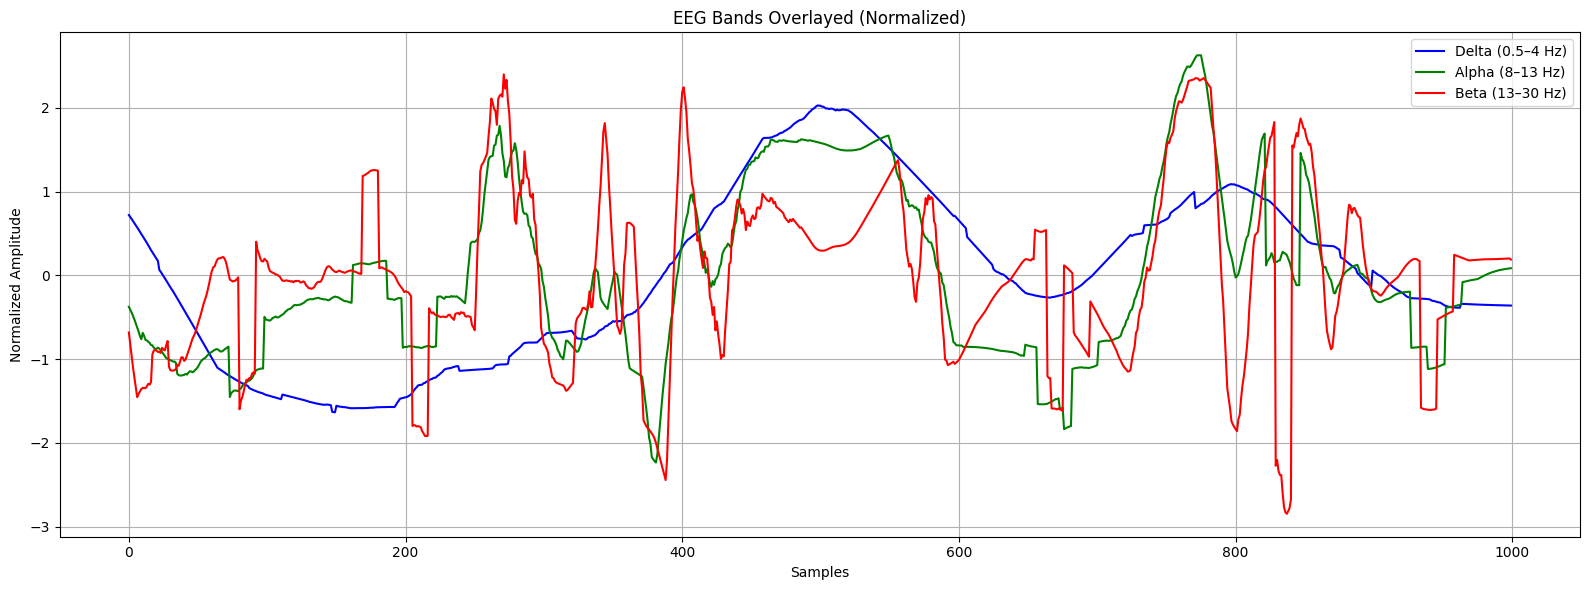

In [5]:


# === Plot all in one graph ===
plt.figure(figsize=(16, 6))

plt.plot(delta_norm, label='Delta (0.5–4 Hz)', color='blue')
plt.plot(alpha_norm, label='Alpha (8–13 Hz)', color='green')
plt.plot(beta_norm, label='Beta (13–30 Hz)', color='red')

plt.title('EEG Bands Overlayed (Normalized)')
plt.xlabel('Samples')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()